In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

In [2]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'tidal_heating_test/'
s = pynbody.load(datadir+simulation+'snapdir_053/snapshot_053')

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [3]:
data = np.loadtxt('oneclustershocks.txt')

In [4]:
time = data[:,0]
tensor = data[:,1:-2]
tidal_heating = data[:,-1]

In [5]:
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

In [6]:
gyr = gyr = 3.15576e16 # in s
unit_time = 3.08568e19
h = 0.6777
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

In [7]:
tensor *= convert_factor[:, np.newaxis]
tidal_heating *= convert_factor

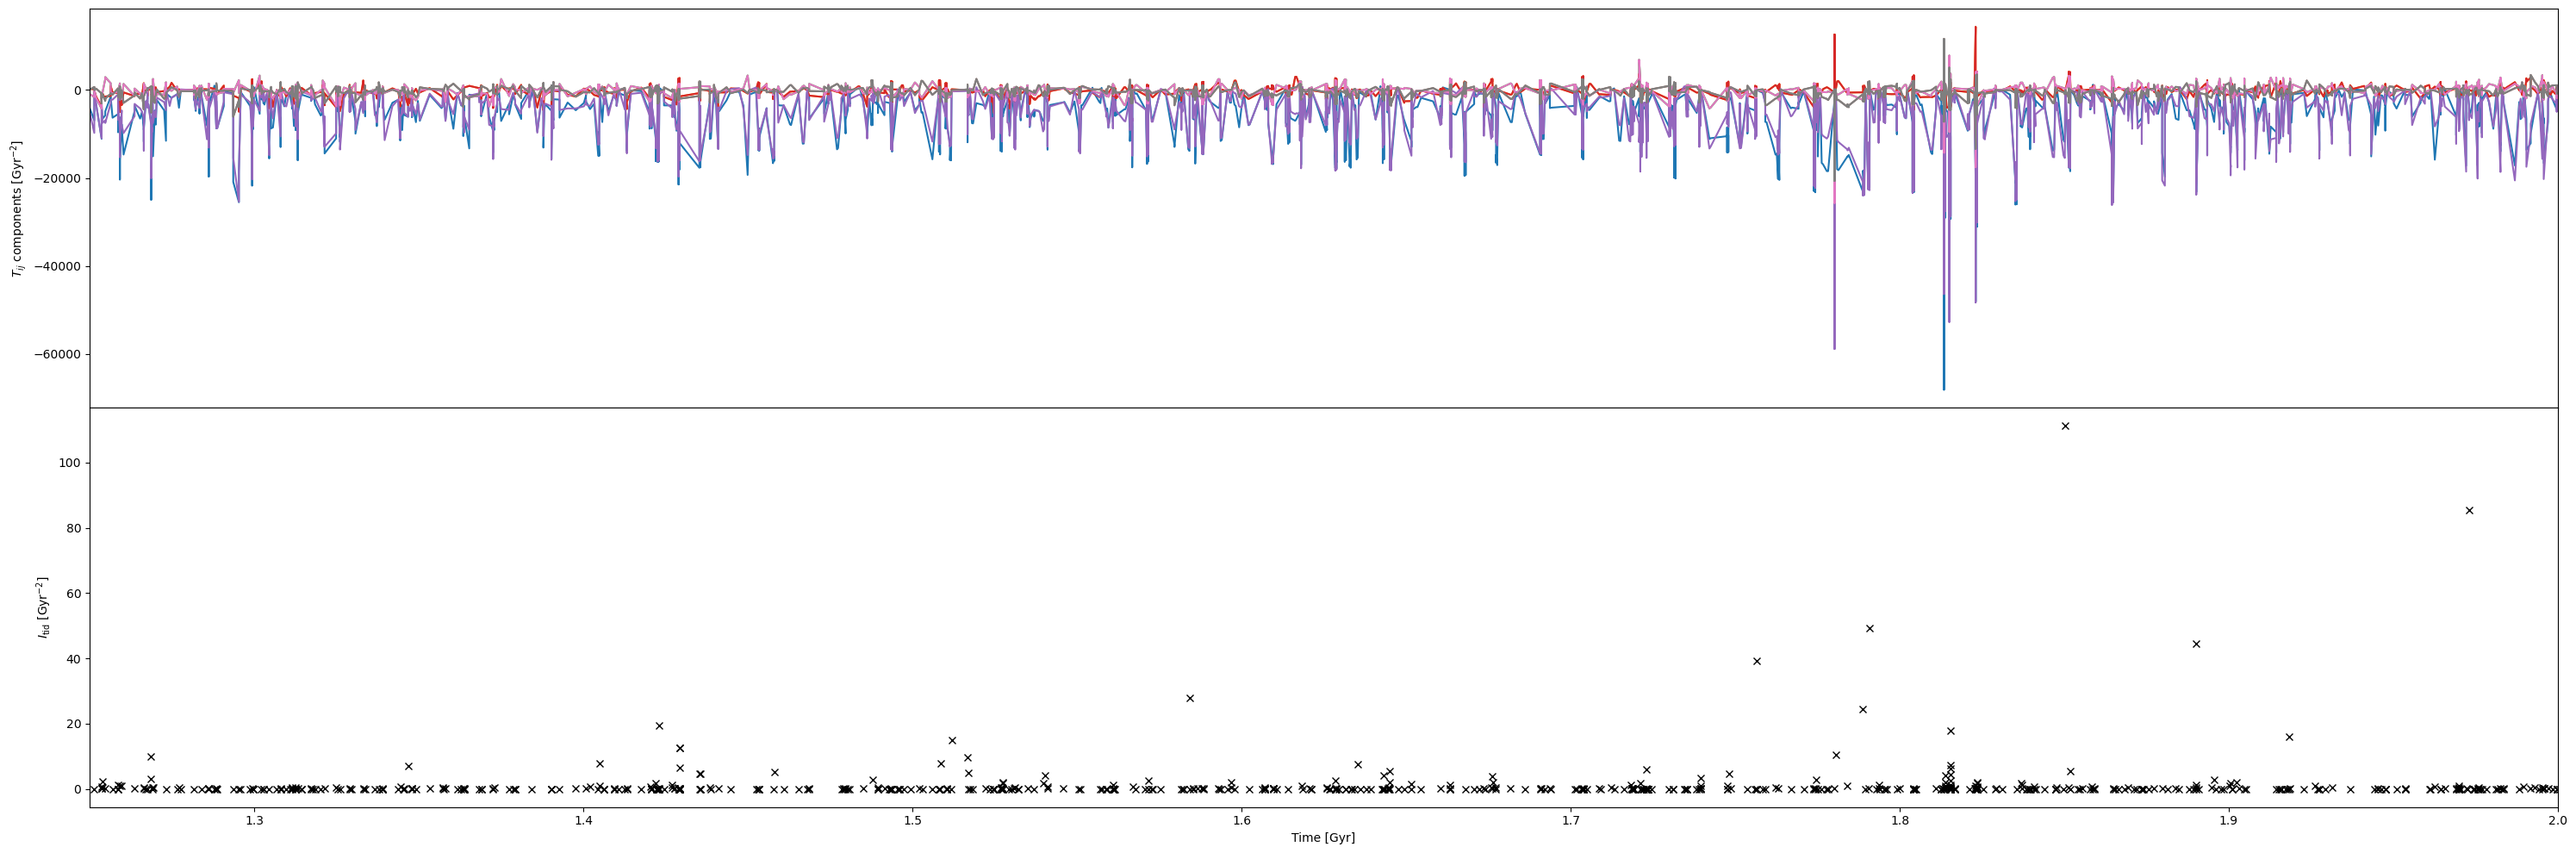

In [10]:
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(30,10))
for i in range(tensor.shape[1]):
    ax[0].plot(time_gyr, tensor[:,i])
ax[0].set(ylabel=r'$T_{ij}$ components [Gyr$^{-2}$]')
for i,val in enumerate(tidal_heating):
    if val>0:
        ax[1].plot(time_gyr[i], val, 'x', c='k')
ax[1].set(xlabel='Time [Gyr]', ylabel=r'$I_{\rm{tid}}$ [Gyr$^{-2}$]')
ax[1].set_xlim(1.25,2)
plt.tight_layout()
plt.savefig('tidal_heating_test.pdf')